In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.polynomial import Polynomial
import warnings
warnings.filterwarnings('ignore')


In [26]:
# Loading raw and cleaned datasets
df_raw = pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\Datasets\Melbourne_housing_FULL.csv')
df_cleaned = pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\clean-datasets\mel-housing-data-cleaned.csv')

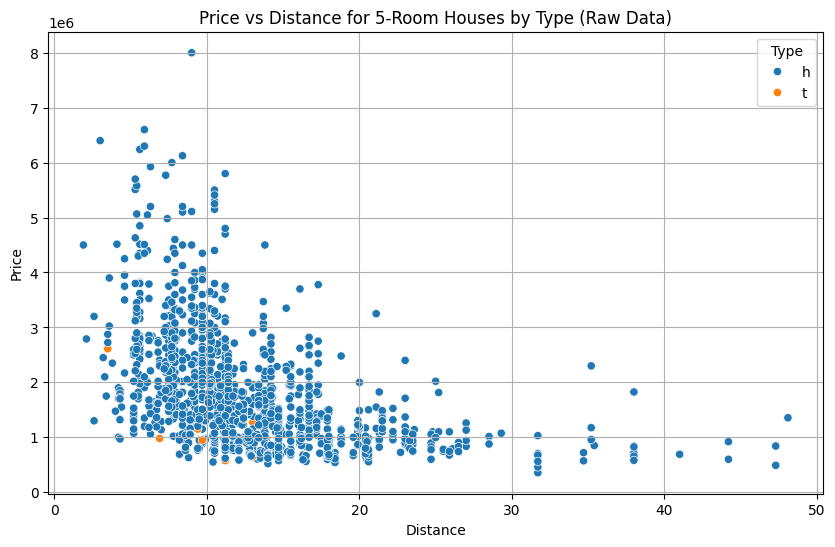

In [27]:
# Filtering raw dataset for 5-room houses and drop missing values for Price, Distance, and Type
df_rooms_5_raw = df_raw[['Rooms', 'Price', 'Distance', 'Type']].dropna()
df_rooms_5_raw = df_rooms_5_raw[df_rooms_5_raw['Rooms'] == 5]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rooms_5_raw, x='Distance', y='Price', hue='Type')
plt.title('Price vs Distance for 5-Room Houses by Type (Raw Data)')
plt.grid(True)
plt.show()


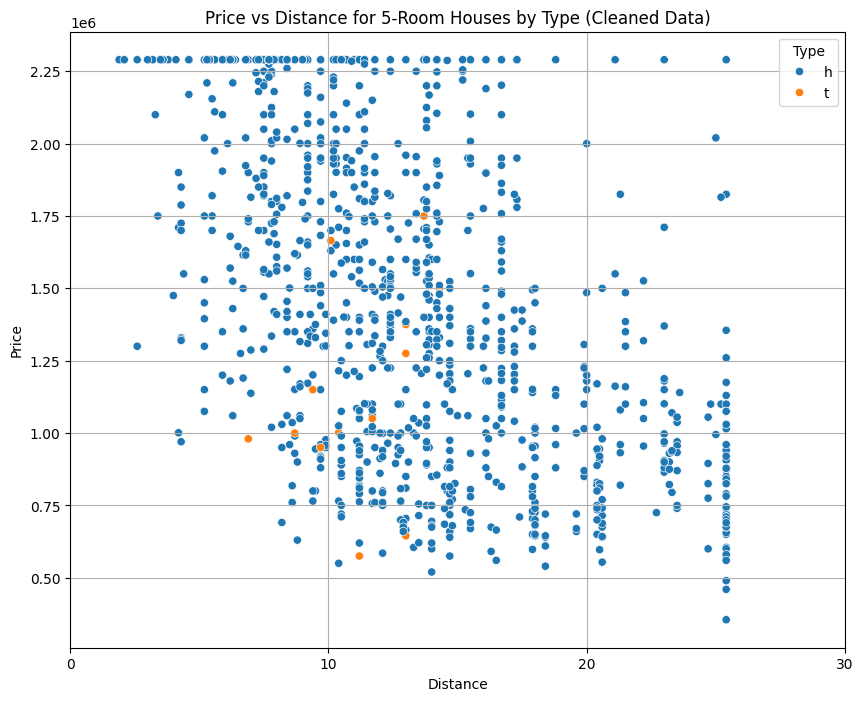

In [28]:
# Filtering cleaned dataset for 5-room houses

df_rooms_5_cleaned = df_cleaned[['Rooms', 'Price', 'Distance_from_CBD', 'Type']].dropna()
df_rooms_5_cleaned = df_rooms_5_cleaned[df_rooms_5_cleaned['Rooms'] == 5]
df_rooms_5_cleaned = df_rooms_5_cleaned.rename(columns={'Distance_from_CBD': 'Distance'})

# Plotting the scatterplot with 10 unit gap on the x-axis
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_rooms_5_cleaned, x='Distance', y='Price', hue='Type')

# Set x-axis ticks with a gap of 10
plt.xticks(np.arange(0, df_rooms_5_cleaned['Distance'].max() + 10, 10))

plt.title('Price vs Distance for 5-Room Houses by Type (Cleaned Data)')
plt.grid(True)
plt.show()

In [29]:
# Combine raw and cleaned data
combined_df = pd.concat([df_rooms_5_raw[['Price', 'Distance']], df_rooms_5_cleaned[['Price', 'Distance']]])

# Remove rows where Distance or Price is zero or negative, since we cannot take log(0)
combined_df = combined_df[(combined_df['Distance'] > 0) & (combined_df['Price'] > 0)]

# Take the logarithm of Distance (since we're fitting a log model)
combined_df['LogDistance'] = np.log(combined_df['Distance'])

# Fit a linear regression model on Log(Distance) to Price
X = combined_df[['LogDistance']]  # Feature: log of Distance
y = combined_df['Price']  # Target: Price

log_model = LinearRegression()
log_model.fit(X, y)

# Generate predictions for plotting the red line
distance_values = np.linspace(combined_df['Distance'].min(), combined_df['Distance'].max(), 100)
log_distance_values = np.log(distance_values)
predicted_prices = log_model.predict(log_distance_values.reshape(-1, 1))


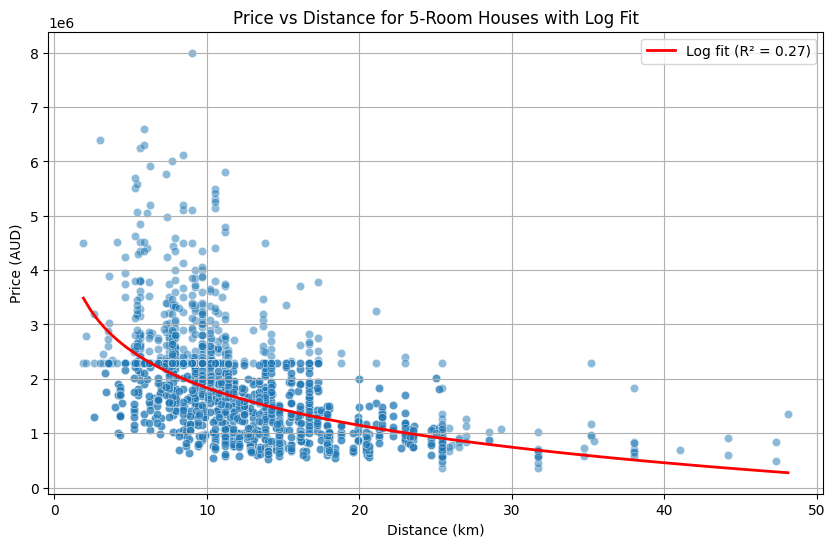

In [30]:
# Plot the scatterplot and the log fit line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df['Distance'], y=combined_df['Price'], alpha=0.5)

# Plot the log fit line
plt.plot(distance_values, predicted_prices, color='red', label='Log fit (R² = {:.2f})'.format(log_model.score(X, y)), linewidth=2)

# Add title and labels
plt.title('Price vs Distance for 5-Room Houses with Log Fit')
plt.xlabel('Distance (km)')
plt.ylabel('Price (AUD)')

# Move legend to the upper right corner
plt.legend(loc='upper right')

# Display the grid and show the plot
plt.grid(True)
plt.show()